In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from plot import vaccination_rate_plot
pd.set_option("display.max_columns", 100)

In [2]:
features_df = pd.read_csv(
    "training_set_features.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    "training_set_labels.csv", 
    index_col="respondent_id"
)

In [3]:
import matplotlib.pyplot as plt

In [4]:
joined_df = features_df.join(labels_df)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!
from sklearn import preprocessing
from dirty_cat import SuperVectorizer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import MultiLabelBinarizer
from catboost import CatBoostClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from category_encoders import OrdinalEncoder as oe


In [6]:
estimators = MultiOutputClassifier(
    #estimator= xgb.XGBClassifier(objective="multi:softprob", random_state=RANDOM_SEED,num_class = 2,learning_rate= 0.01, n_estimators=300, min_child_weight= 10,gamma= 0.1, maxdepth= 3, subsample= 0.6)
   estimator = CatBoostClassifier()

)

In [7]:
preprocessor = SuperVectorizer()
#estimators = MultiOutputClassifier(
#    estimator=LogisticRegression(penalty="l2", C=1)
#)
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ('simple_imputer', SimpleImputer(strategy = "mean")),
    ("estimators", estimators),
])
full_pipeline

Pipeline(steps=[('preprocessor', SuperVectorizer()),
                ('simple_imputer', SimpleImputer()),
                ('estimators',
                 MultiOutputClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x0000017CB2B36E00>))])

In [8]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)


In [9]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
cat_cols = X_train.select_dtypes('object').columns
ct = ColumnTransformer(
    [('ordinal', oe(), cat_cols)],
    remainder='passthrough')
sfs2 = SFS(CatBoostClassifier(n_estimators=100, verbose=False), 
           k_features=X_train.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5,
           n_jobs = 3)
sfs2 = sfs2.fit(ct.fit_transform(X_train), np.array(y_train.h1n1_vaccine).ravel())

C:\Users\AliAzak\AppData\Local\Temp\ipykernel_21868\3714307251.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 out of  35 | elapsed:   18.4s finished

[2022-06-21 05:14:51] Features: 1/35 -- score: 0.7031421254017985[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  34 out of  34 | elapsed:   23.3s finished

[2022-06-21 05:15:14] Features: 2/35 -- score: 0.7802895553711114[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurr

In [19]:
sfdf2 = pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
sfdf2

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(28,)","[0.7214741136274528, 0.7130484616912676, 0.701...",0.703142,"(28,)",0.017044,0.013261,0.00663
2,"(21, 28)","[0.7888573308937473, 0.7897941616173109, 0.775...",0.78029,"(21, 28)",0.009527,0.007412,0.003706
3,"(21, 26, 28)","[0.827885495043035, 0.8341947625971207, 0.8225...",0.825575,"(21, 26, 28)",0.006326,0.004922,0.002461
4,"(21, 26, 27, 28)","[0.8462785422228861, 0.8508326890489056, 0.842...",0.843815,"(21, 26, 27, 28)",0.005535,0.004306,0.002153
5,"(10, 21, 26, 27, 28)","[0.8496457310356417, 0.8592929440829508, 0.852...",0.851751,"(10, 21, 26, 27, 28)",0.005164,0.004018,0.002009
6,"(10, 21, 25, 26, 27, 28)","[0.8545263811355277, 0.8597520258820479, 0.859...",0.855316,"(10, 21, 25, 26, 27, 28)",0.004547,0.003538,0.001769
7,"(10, 13, 21, 25, 26, 27, 28)","[0.8568674035212187, 0.8637900338447506, 0.858...",0.857438,"(10, 13, 21, 25, 26, 27, 28)",0.004891,0.003805,0.001903
8,"(10, 13, 21, 22, 25, 26, 27, 28)","[0.8580935755493737, 0.8653036747994169, 0.859...",0.85893,"(10, 13, 21, 22, 25, 26, 27, 28)",0.004357,0.00339,0.001695
9,"(10, 13, 21, 22, 25, 26, 27, 28, 31)","[0.8567572487444223, 0.8676788227361368, 0.866...",0.86106,"(10, 13, 21, 22, 25, 26, 27, 28, 31)",0.006131,0.00477,0.002385
10,"(10, 13, 21, 22, 25, 26, 27, 28, 29, 31)","[0.8583073504975635, 0.8688909945357841, 0.868...",0.86254,"(10, 13, 21, 22, 25, 26, 27, 28, 29, 31)",0.00642,0.004995,0.002498


(3, 4, 10, 12, 13, 17, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32)


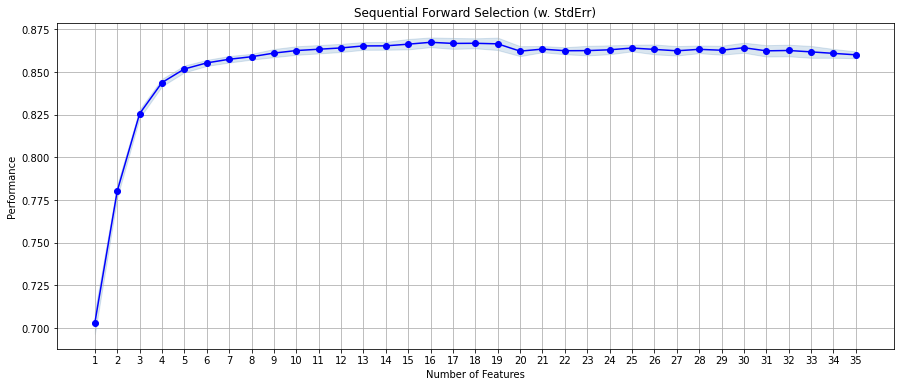

In [23]:
print(sfdf2.loc[19, 'feature_idx'])
fig = plot_sfs(sfs2.get_metric_dict(), kind='std_err', figsize=(15,6))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
all_cols = X_train.columns
selected_columns2 = [all_cols[i] for i in list((3, 4, 10, 12, 13, 17, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32))]

In [28]:
# Train model
full_pipeline.fit(X_train, y_train)
preds = full_pipeline.predict_proba(X_eval)

SyntaxError: invalid syntax (2317112577.py, line 2)

In [11]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.588038,0.533446
16516,0.043263,0.360391
3106,0.069645,0.594046
16981,0.944662,0.959031
19111,0.062326,0.795400


In [12]:
full_pipeline.score(X_train, y_train)

0.7870116805454647

In [13]:
roc_auc_score(y_eval, y_preds)


0.8652429659288653

In [14]:
full_pipeline.fit(features_df, labels_df)

Learning rate set to 0.041889
0:	learn: 0.6589868	total: 10.7ms	remaining: 10.7s
1:	learn: 0.6294658	total: 18.3ms	remaining: 9.13s
2:	learn: 0.6027359	total: 26.6ms	remaining: 8.85s
3:	learn: 0.5778077	total: 35.1ms	remaining: 8.73s
4:	learn: 0.5571686	total: 43.4ms	remaining: 8.64s
5:	learn: 0.5394795	total: 51.6ms	remaining: 8.55s
6:	learn: 0.5218381	total: 60.1ms	remaining: 8.52s
7:	learn: 0.5065731	total: 67.7ms	remaining: 8.39s
8:	learn: 0.4923018	total: 76.5ms	remaining: 8.42s
9:	learn: 0.4796543	total: 84.2ms	remaining: 8.33s
10:	learn: 0.4687226	total: 93ms	remaining: 8.37s
11:	learn: 0.4583391	total: 101ms	remaining: 8.29s
12:	learn: 0.4489619	total: 109ms	remaining: 8.25s
13:	learn: 0.4410182	total: 116ms	remaining: 8.15s
14:	learn: 0.4338119	total: 124ms	remaining: 8.11s
15:	learn: 0.4272654	total: 130ms	remaining: 8.02s
16:	learn: 0.4218914	total: 138ms	remaining: 7.98s
17:	learn: 0.4164515	total: 146ms	remaining: 7.95s
18:	learn: 0.4113410	total: 154ms	remaining: 7.94s
19

Pipeline(steps=[('preprocessor', SuperVectorizer()),
                ('simple_imputer', SimpleImputer()),
                ('estimators',
                 MultiOutputClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x0000017CB2B36E00>))])

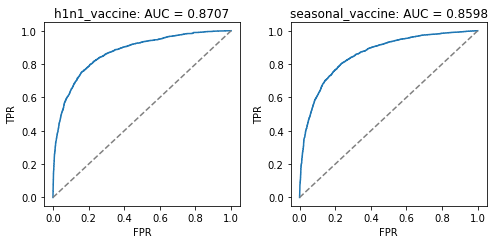

In [15]:
from plot import plot_roc
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [16]:
test_features_df = pd.read_csv("test_set_features.csv", 
                               index_col="respondent_id")
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.91014392, 0.08985608],
        [0.96543992, 0.03456008],
        [0.862029  , 0.137971  ],
        ...,
        [0.85348062, 0.14651938],
        [0.98225879, 0.01774121],
        [0.49984855, 0.50015145]]),
 array([[0.76798066, 0.23201934],
        [0.98362563, 0.01637437],
        [0.26507395, 0.73492605],
        ...,
        [0.81327858, 0.18672142],
        [0.70573301, 0.29426699],
        [0.41224014, 0.58775986]])]

In [17]:
submission_df = pd.read_csv("submission_format.csv", 
                            index_col="respondent_id")
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.089856,0.232019
26708,0.034560,0.016374
26709,0.137971,0.734926
26710,0.680970,0.892392
26711,0.278692,0.443839


In [18]:
submission_df.to_csv('my_submission_catboost_sfs.csv', index=True)